In [2]:
tasmia = "In the name of Allah, the most Benoficient, the most Merciful."
print(tasmia)

In the name of Allah, the most Benoficient, the most Merciful.


### Import Libraries

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, levene, f_oneway, chi2_contingency, pearsonr
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [4]:
df = pd.read_csv("teachingratings.csv")
df.sample(5)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
350,no,52,male,more,0.756683,3.5,upper,yes,yes,46,69,72,0,0,0,0,1,1,1
30,no,33,female,more,-0.126001,4.0,upper,yes,yes,33,41,7,0,0,1,0,1,1,1
289,no,32,male,more,-0.326015,4.3,upper,yes,yes,20,22,56,0,0,0,0,1,1,1
129,no,62,male,more,-0.733091,3.7,lower,yes,yes,80,157,23,0,0,0,0,0,1,1
316,no,52,female,more,-1.090389,4.4,upper,yes,no,45,52,65,0,0,1,0,1,1,0


In [5]:
df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <code>T-Test</code>

**<code>Null Hypothesis:</code>       Evaluation score is independent of female and male instructors** <p>
**<code>Alternate Hypothesis:</code>  Evaluation score depends on female and male instructors**

In [6]:
ttest_ind(df[df["gender"] == "male"]["eval"], df[df["gender"] == "female"]["eval"])

Ttest_indResult(statistic=3.249937943510772, pvalue=0.0012387609449522217)

### Probability of Getting a High or Low Teaching Evaluation

In [7]:
eval_mean = round(df["eval"].mean(), 3)
eval_std = round(df["eval"].std(), 3)

print(eval_mean, eval_std)

3.998 0.555


In [8]:
prob = scipy.stats.norm.cdf((4.5 - eval_mean) / eval_std)
print(1- prob)

0.1828639734596742


### <code>Levene Test</code>

**<code>Null Hypothesis</code> Population Variances are equal**<p>
**<code>Alternate Hypothesis</code> Populaion Variances are not equal**

In [9]:
levene(df[df["gender"] == "male"]["eval"], df[df["gender"] == "female"]["eval"], center = "mean")

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

### <code>ANOVA</code>
**<code>Null Hypothesis</code> Samples have same mean values** <p>
**<code>Alternate Hypothesis</code> Samples have different mean values**

In [10]:
def group(x):
    if x <= 40:
        return "younger"
    elif x > 40 and x < 57:
        return "middle"
    else:
        return "older"

df["age_group"] = df["age"].apply(group)

**Statistics of beauty by age group**

In [11]:
age_stats = df.groupby("age_group")["beauty"].agg(["count", "mean", "std"])
age_stats

,count,mean,std
age_group,,,
middle,228,-0.035111,0.686637
older,122,-0.245777,0.740720
younger,113,0.336196,0.913748


**Prepare Data**

In [12]:
younger = df[df["age_group"] == "younger"]["beauty"]
middle = df[df["age_group"] == "middle"]["beauty"]
older = df[df["age_group"] == "older"]["beauty"]

**f-oneway (ANOVA)**

In [13]:
f_stats, pvalue = f_oneway(younger, middle, older)

print(f"f-statistics =",f_stats, f"p-value =", pvalue)

f-statistics = 17.597558611010122 p-value = 4.3225489816137975e-08


**Test Results**

In [14]:
if pvalue > 0.5:
    print("Null Hypothesis Accepted")
else:
    print("Alternate Hypothesis Accepted")

Alternate Hypothesis Accepted


### <code>ANOVA</code>
**<code>Null Hypothesis</code> Evalution score is not affected by instructor age**<p>
**<code>Alternate Hypothesis</code> Evalution score is affected by instructor age**

In [15]:
younger_eval = df[df["age_group"] == "younger"]["eval"]
middle_eval = df[df["age_group"] == "middle"]["eval"]
older_eval = df[df["age_group"] == "older"]["eval"]

**f-oneway ANOVA**

In [16]:
f_statistics, pvalue = f_oneway(younger_eval, middle_eval, older_eval)
print(f"f-statistics = {f_statistics}", f"pvalue = {pvalue}")

f-statistics = 1.2226327996572206 pvalue = 0.29540894225417536


In [17]:
if pvalue > 0.05:
    print("Accept Null Hypothesis")

else:
    print("Accept Alternate Hypothesis")

Accept Null Hypothesis


### <code>Chi-Squared Test</code>
**<code>Null Hypothesis</code> There is association between gender and being tenured**<p>
**<code>Alternate Hypothesis</code> There is no association between gender and being tenured**

In [18]:
mt = df[df["gender"] == "male"]["tenure"]
yt = df[df["gender"] == "female"]["tenure"]

**Values**

In [19]:
mft = pd.crosstab(df["tenure"],  df["gender"])
mft

gender,female,male
tenure,,
no,50,52
yes,145,216


In [20]:
chisquare, pvalue, freedom, array = chi2_contingency(mft, correction = False)

In [21]:
print(f"Chi-Square Statistics = {chisquare}\n P-Value = {pvalue}\n Degree of Freedom = {freedom}\n Expected Values = {array}")

Chi-Square Statistics = 2.557051129789522
 P-Value = 0.10980322511302845
 Degree of Freedom = 1
 Expected Values = [[ 42.95896328  59.04103672]
 [152.04103672 208.95896328]]


In [22]:
if pvalue >= 0.05:
    print("Accept Null Hypothesis")
else:
    print("Accept Alternate Hypothesis")

Accept Null Hypothesis


### <code>Pearson Correlation Test</code>
**<code>Null Hypothesis</code> There is no correlation between instructor beauty score and evaluation score**<p>
**<code>Alternate Hypothesis</code> There is correlation between instructor beauty score and evaluation score**

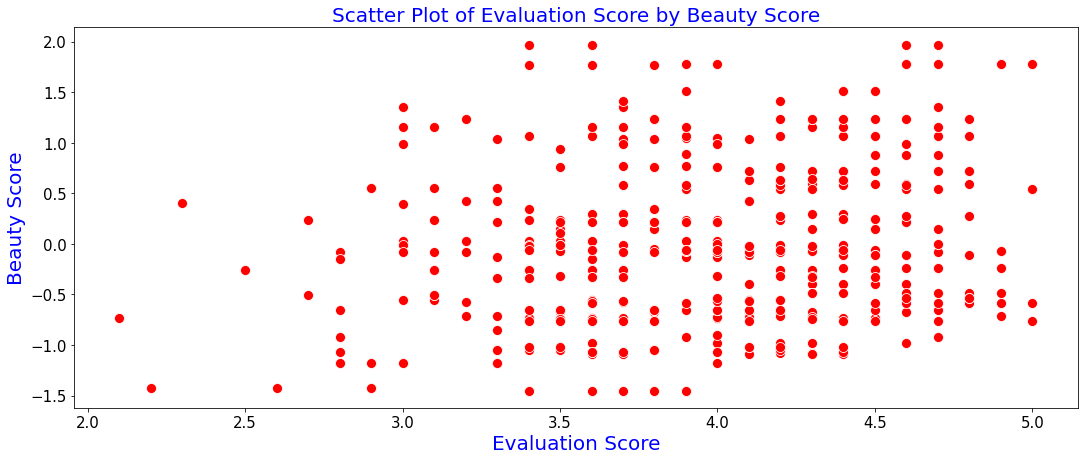

In [23]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "eval", y = "beauty", data = df, s = 100, color = "red")
plt.title("Scatter Plot of Evaluation Score by Beauty Score", color = "blue", size = 20)
plt.xlabel("Evaluation Score", color = "blue", size = 20)
plt.ylabel("Beauty Score", color = "blue", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [24]:
df[["beauty", "eval"]].corr()

,beauty,eval
beauty,1.000000,0.189039
eval,0.189039,1.000000


**Test**

In [25]:
p_stats, pvalue = pearsonr(df["beauty"], df["eval"])
print(f"Correlation = {p_stats}, P-Value = {pvalue}")

Correlation = 0.18903909084045212, P-Value = 4.247115419812614e-05


**Test Result**

In [26]:
if pvalue > 0.05:
    print("Accept Null Hypothesis")
else:
    print("Accept Alternate Hypothesis")

Accept Alternate Hypothesis


### Perform a two-sample t-test for independent samples.

In [27]:
Sample1 = [9, 11, 10,11,10,12, 9,11,12, 9, 10]
Sample2 = [10, 13, 10, 13, 12, 9, 11, 12, 12, 12, 13]

In [28]:
ttest_ind(Sample1, Sample2)

Ttest_indResult(statistic=-2.2164816032790386, pvalue=0.03841461541539729)

### Mean μ = 63.18 inches and Standard Deviation σ= 13.27 inches. What is the Z-score when x = 91.54 inches?

In [29]:
z_score = (91.54 - 63.16) / 13.27
z_score

2.138658628485306

### Average Wage = 5.85, Standard Deviation = 0.35, The probability that a selected worker earns more than 6.90?

In [30]:
prob = scipy.stats.norm.cdf((6.90 - 5.85) / 0.35)
print(1- prob)

0.0013498980316301035


### Mean = 490, Variance = 400, Probability that a randomly selected pill contains at least 500 mg of minerals

In [31]:
prob2 = scipy.stats.norm.cdf((500 - 490) / 20)
print(1 - prob2)

0.3085375387259869


### BOSTON Dataset

In [32]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [34]:
boston_df = boston_df.drop(columns = ["Unnamed: 0"])
boston_df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,12.01,21.8
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,13.33,23.1
419,11.81230,0.0,18.10,0.0,0.718,6.824,76.5,1.7940,24.0,666.0,20.2,22.74,8.4
182,0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,4.82,37.9
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24.0,666.0,20.2,15.70,14.2


**<code>Boxplot:</code> "Median value of owner-occupied homes"**

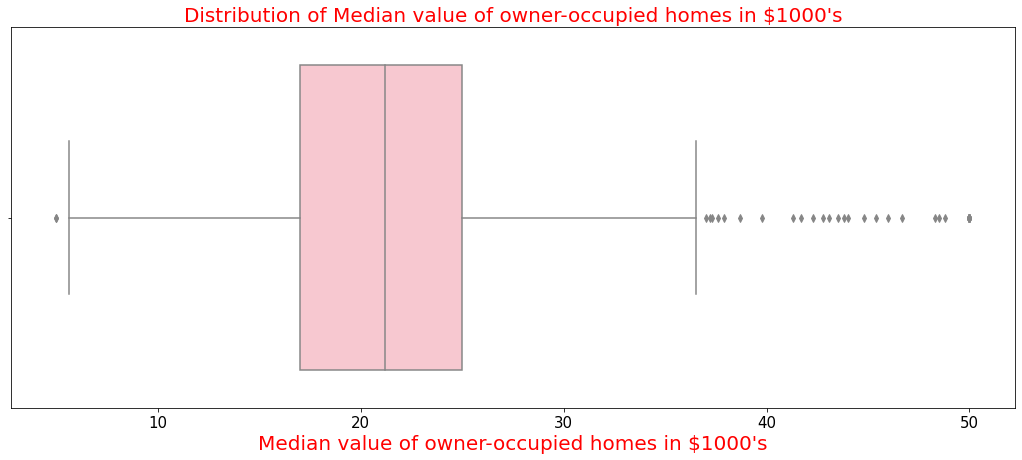

In [39]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = boston_df["MEDV"], color = "pink")
plt.title("Distribution of Median value of owner-occupied homes in $1000's", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Median value of owner-occupied homes in $1000's", color = "red", size = 20)
plt.show()

**Houses at Charles River**

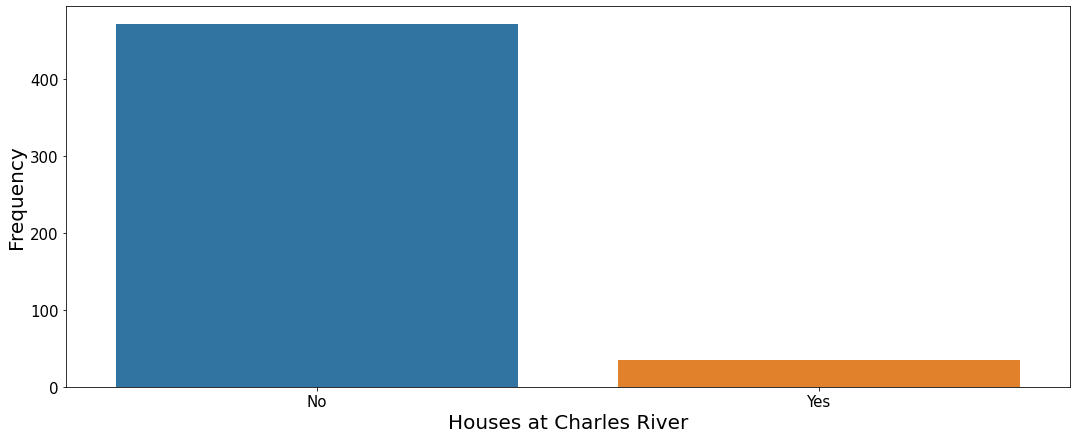

In [48]:
plt.figure(figsize = (18, 7))
sns.countplot(x = boston_df["CHAS"])
plt.xlabel("Houses at Charles River", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xticks([0.0, 1.0], labels = ["No", "Yes"], size = 15)
plt.yticks(size = 15)
plt.show()

**Median Value by House Age**

In [51]:
def age(x):
    if x <= 35:
        return "new"
    elif x > 35 and x <= 70:
        return "moderate"
    else:
        return "old"
    
boston_df["age_group"] = boston_df["AGE"].apply(age)

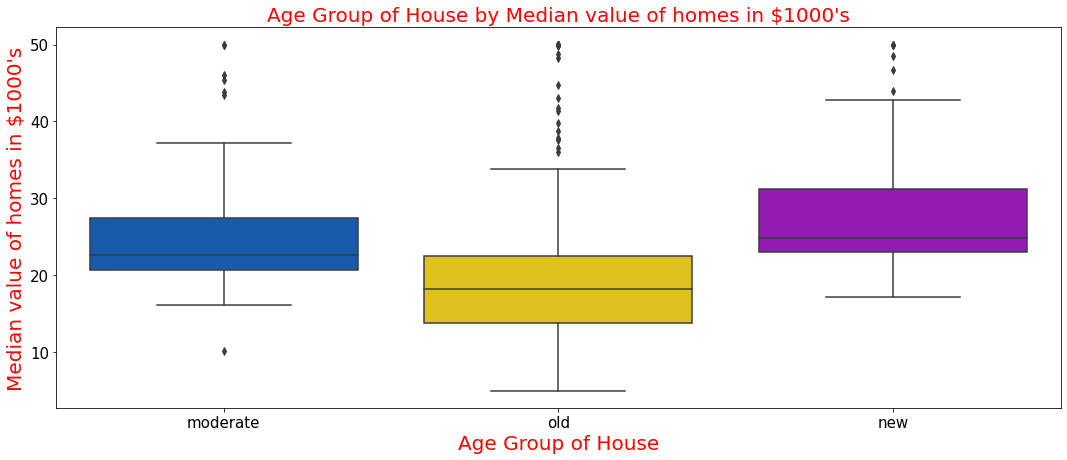

In [55]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = boston_df["age_group"], y = boston_df["MEDV"], palette = "prism")
plt.title("Age Group of House by Median value of homes in $1000's", size = 20, color = "red")
plt.xlabel("Age Group of House", size = 20, color = "red")
plt.ylabel("Median value of homes in $1000's", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Scatter Plot between Nitric oxide concentrations and the proportion of non-retail business acres per town**

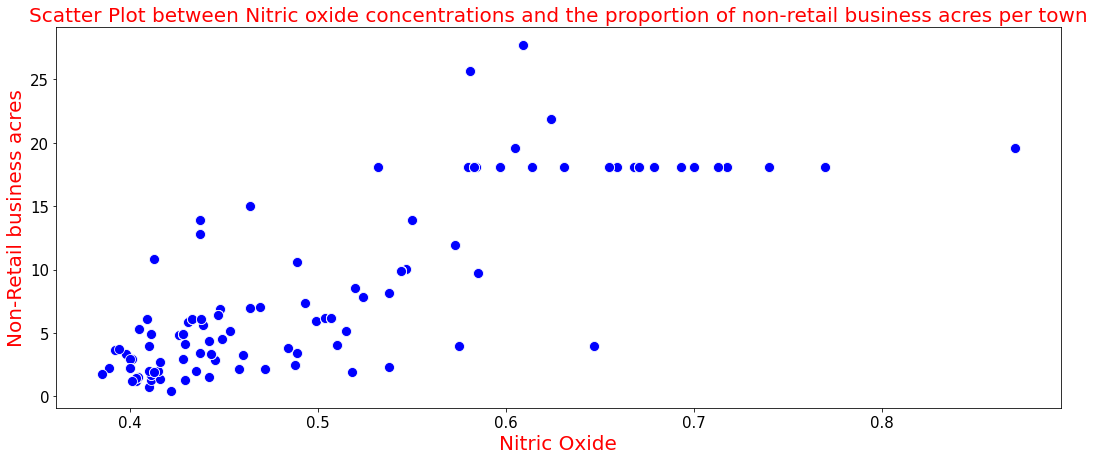

In [61]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df, s = 100, color = "blue")
plt.title("Scatter Plot between Nitric oxide concentrations and the proportion of non-retail business acres per town", color = "red", size = 20)
plt.xlabel("Nitric Oxide", size = 20, color = "red")
plt.ylabel("Non-Retail business acres", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Histogram for the pupil to teacher ratio variable**

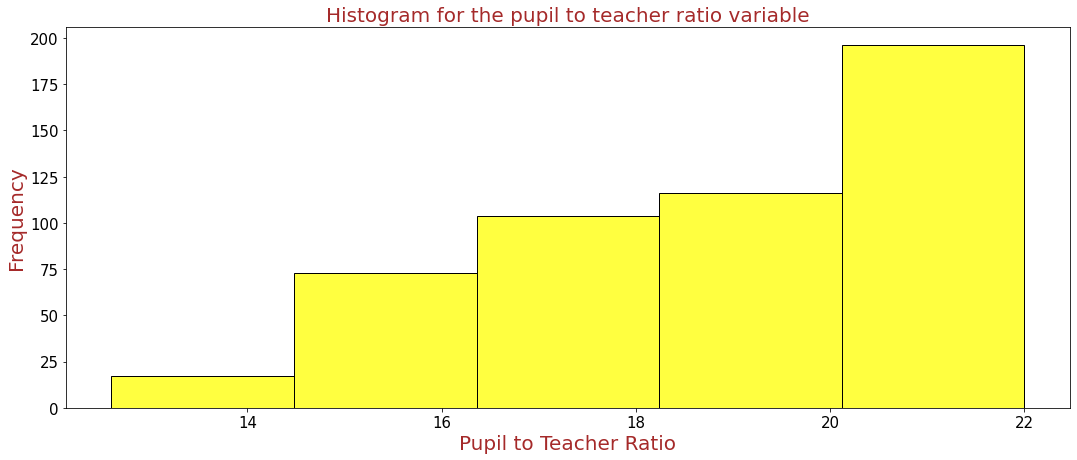

In [66]:
plt.figure(figsize = (18, 7))
sns.histplot(x = boston_df["PTRATIO"], color = "yellow", bins = 5)
plt.title("Histogram for the pupil to teacher ratio variable", color = "brown", size = 20)
plt.xlabel("Pupil to Teacher Ratio", size = 20, color = "brown")
plt.ylabel("Frequency", size = 20, color = "brown")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### <code>T-Test</code>
**<code>Null Hypothesis</code>House Price independent of Charles River**<p>
**<code>Alternate Hypothesis</code> House Price dependent on Charles River**

In [67]:
hcr = boston_df[boston_df["CHAS"] == 1]["MEDV"]
hncr = boston_df[boston_df["CHAS"] == 0]["MEDV"]

**Test**

In [69]:
t_stats, p_value = ttest_ind(hcr, hncr)
print(f"T-Statistics = {t_stats}, P-Value = {p_value}")

T-Statistics = 3.996437466090509, P-Value = 7.390623170519905e-05


**Test Result**

In [70]:
if p_value > 0.05:
    print("Accept Null Hypothesis")
else:
    print("Accept Alternate Hypothesis")

Accept Alternate Hypothesis


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### <code>ANOVA</code>
**<code>Null Hypothesis</code>House Price is not different by Age**<p>
**<code>Alternate Hypothesis</code> House Price is different by AGE**

In [72]:
new_house = boston_df[boston_df["age_group"] == "new"]["MEDV"]
moderate_house = boston_df[boston_df["age_group"] == "moderate"]["MEDV"]
old_house = boston_df[boston_df["age_group"] == "old"]["MEDV"]

**Test**

In [73]:
f_stats, p_value = f_oneway(new_house, moderate_house, old_house)
print(f"F-Statistics = {f_stats}, P-Value = {p_value}")

F-Statistics = 36.40764999196599, P-Value = 1.7105011022702984e-15


**Test Result**

In [75]:
if p_value > 0.05:
    print("Accept Null Hypothesis")
else:
    print("Accept Alternate Hypothesis")

Accept Alternate Hypothesis


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### <code>Pearson Correlation</code>
**<code>Null Hypothesis</code> There is NO relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town**<p>
**<code>Alternate Hypothesis</code> There is relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town**

In [76]:
pc_stats, p_value = pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Pearson Correlation = {pc_stats}, P-Value = {p_value}")

Pearson Correlation = 0.763651446920915, P-Value = 7.913361061239593e-98


**Test Result**

In [77]:
if p_value > 0.05:
    print("Accept Null Hypothesis")
else:
    print("Accept Alternate Hypothesis")

Accept Alternate Hypothesis


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)